In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #decision tree

In [2]:
df=pd.read_csv(r"C:\\Users\\USER\\Downloads\\Desktop\\ML\\ML\\dataset\\Social_Network_Ads.csv")
df.drop(["User ID", "Gender"], axis=1, inplace=True)
df.head(),df.isnull().sum(),df.shape

(   Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 Age                0
 EstimatedSalary    0
 Purchased          0
 dtype: int64,
 (400, 3))

In [3]:
x=df.iloc[:,:-1]
y=df["Purchased"]

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [5]:
sc.fit(x)


StandardScaler()

In [6]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
x_train.shape


(300, 2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=2)

In [10]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

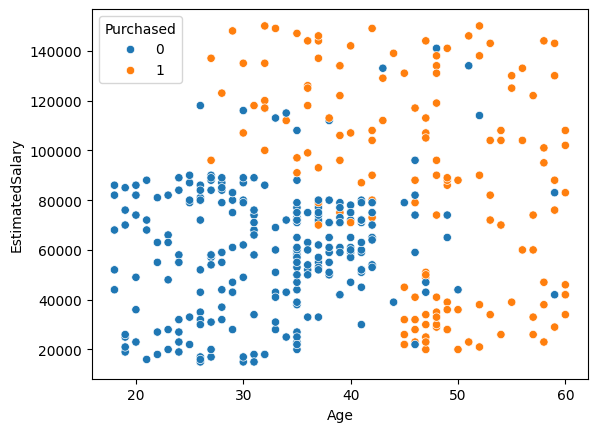

In [12]:
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=df)


In [13]:
from mlxtend.plotting import plot_decision_regions


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


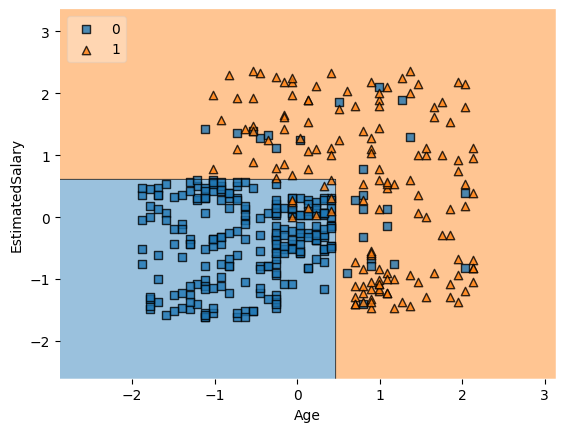

In [14]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt,legend=2)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


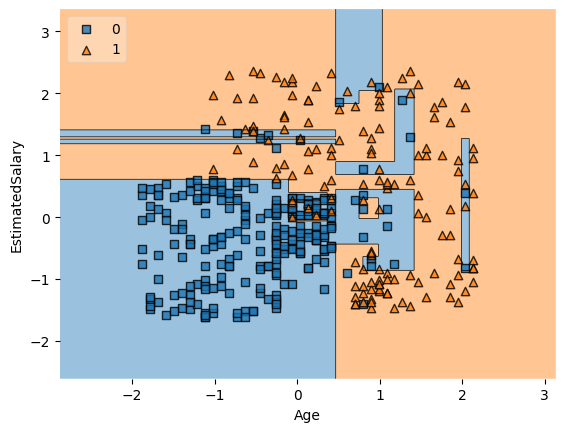

In [15]:
#for dt1
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1,legend=2)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

In [16]:
dt1.score(x_test,y_test)

0.82

In [17]:
dt.score(x_test,y_test)

0.92

In [18]:
dt.score(x_train,y_train)

0.9133333333333333

In [19]:
dt.predict(np.array([[35, 34000]]))


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [20]:
from sklearn.tree import plot_tree

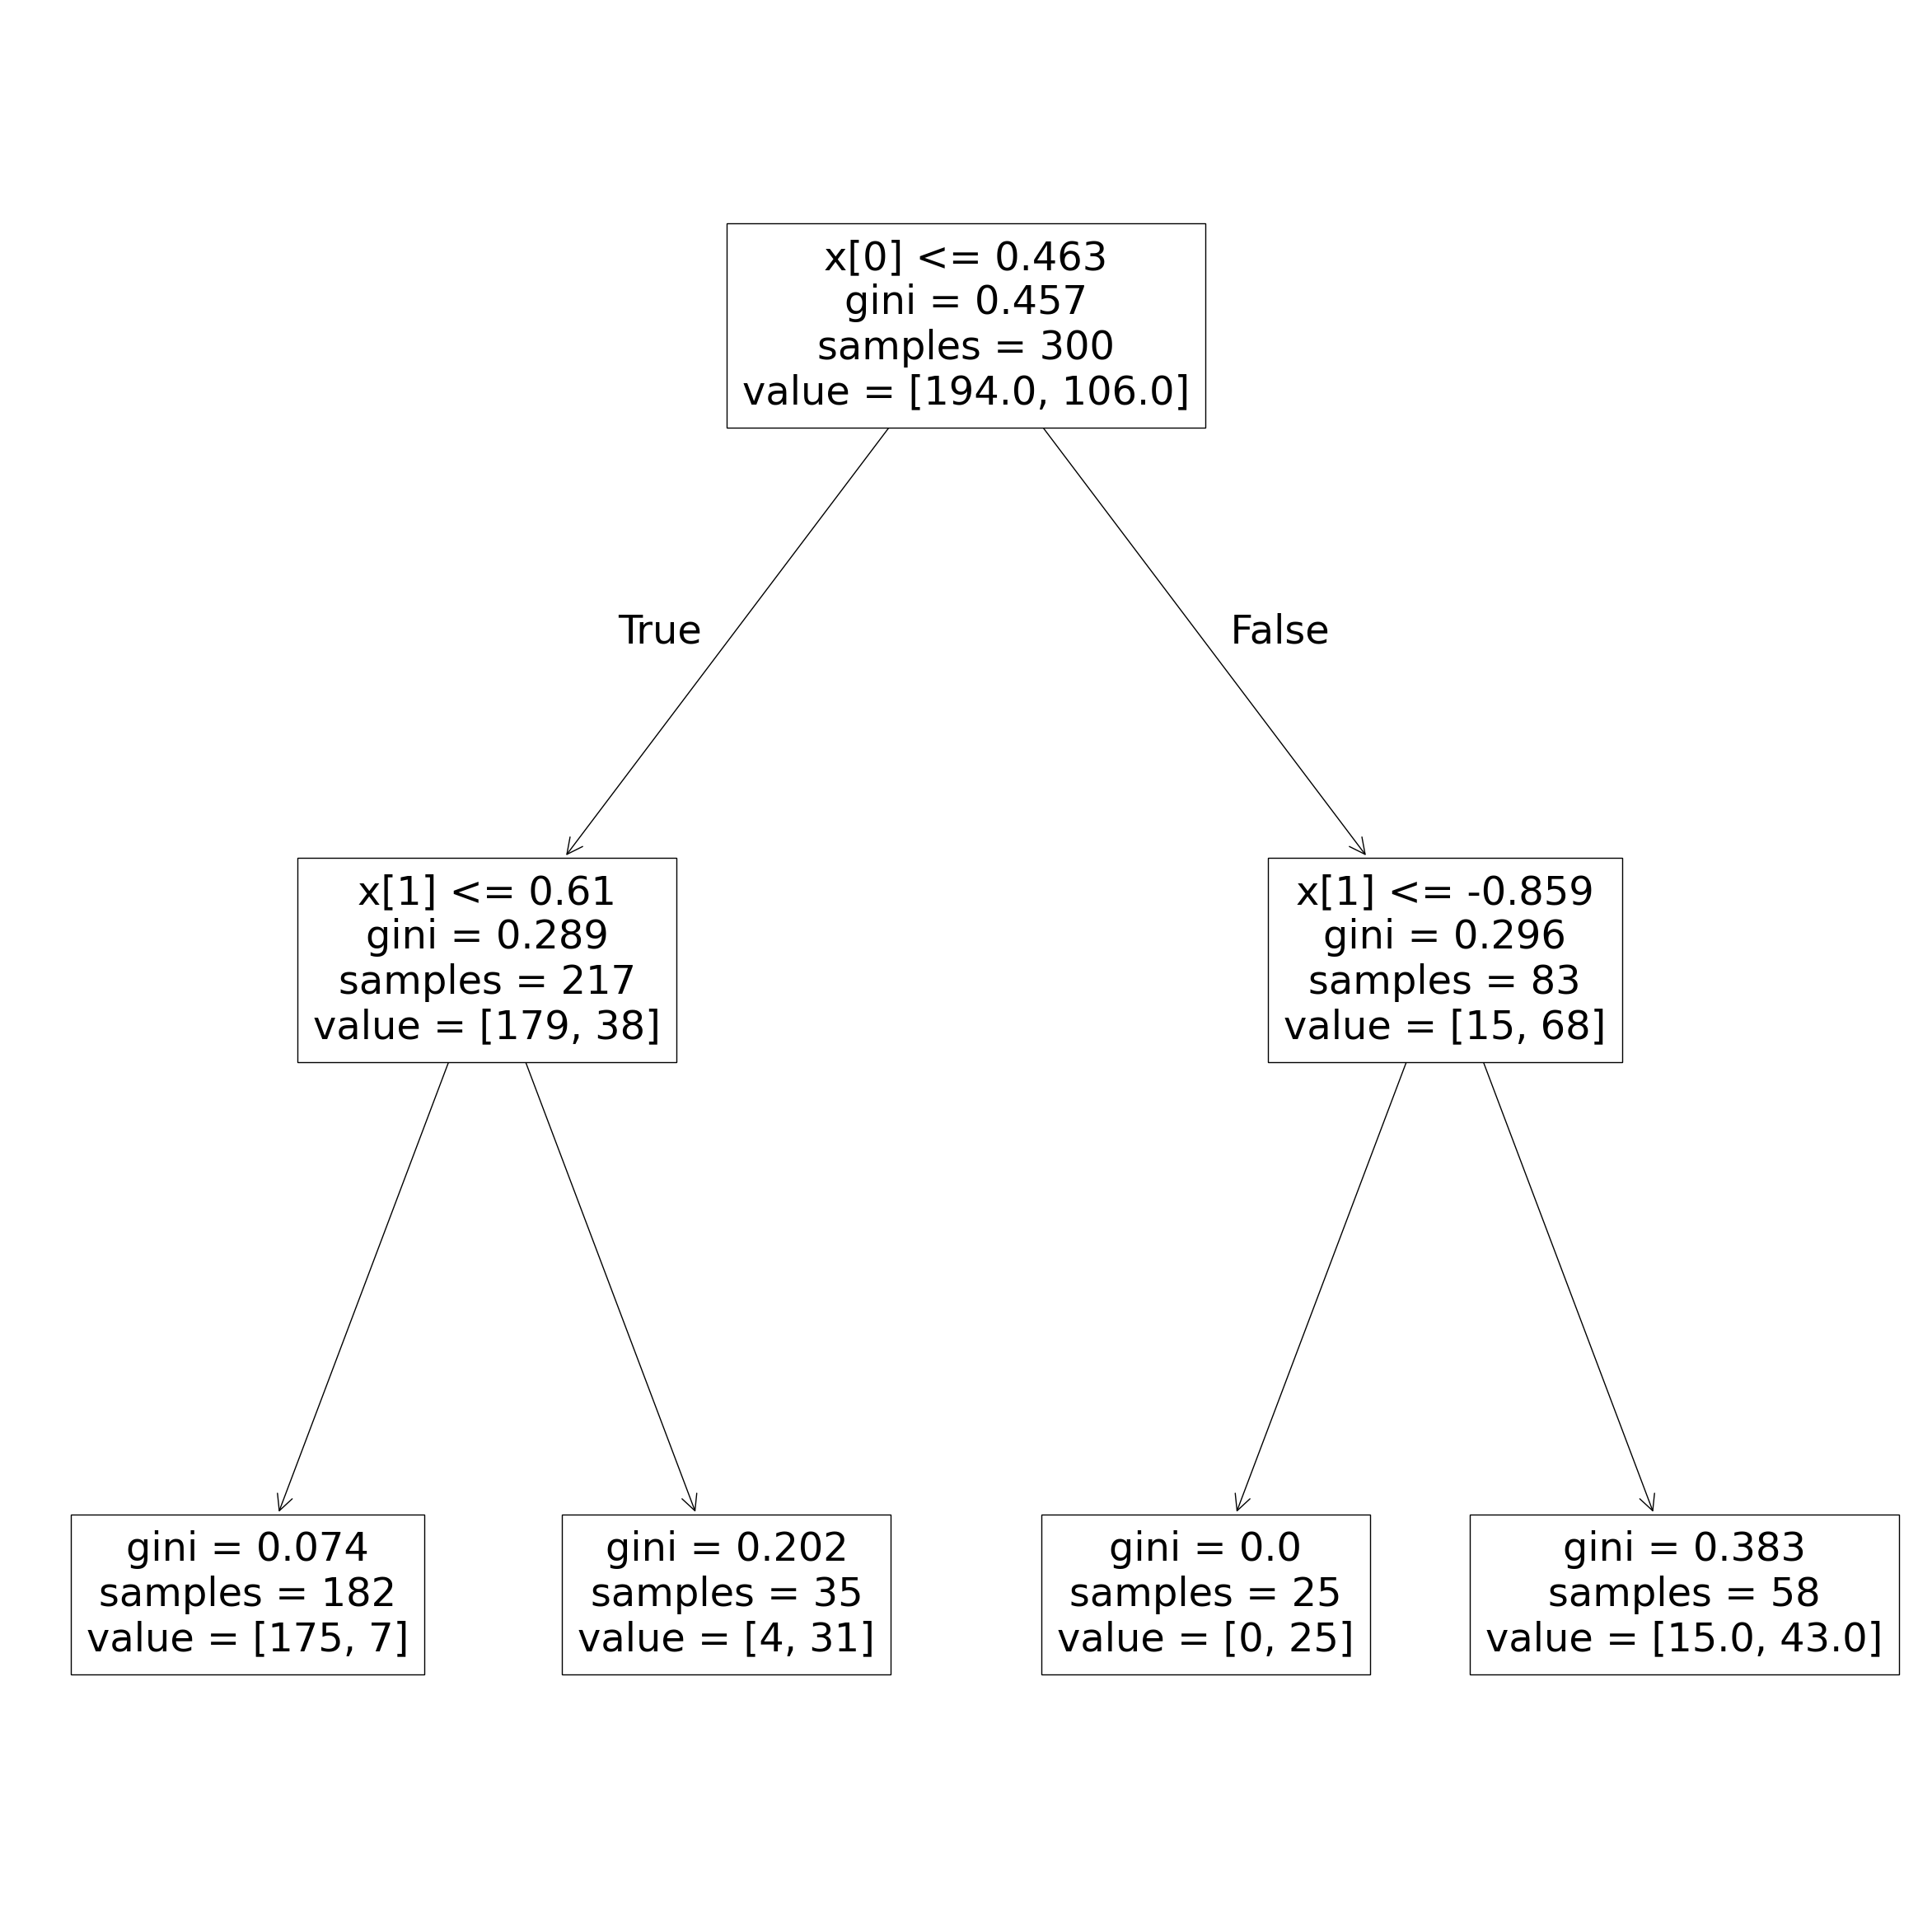

In [21]:
plt.figure(figsize=(30,30))
plot_tree(dt)
plt.savefig("tree1.png")  # Save the figure before displaying it
plt.show()  # Display the plot

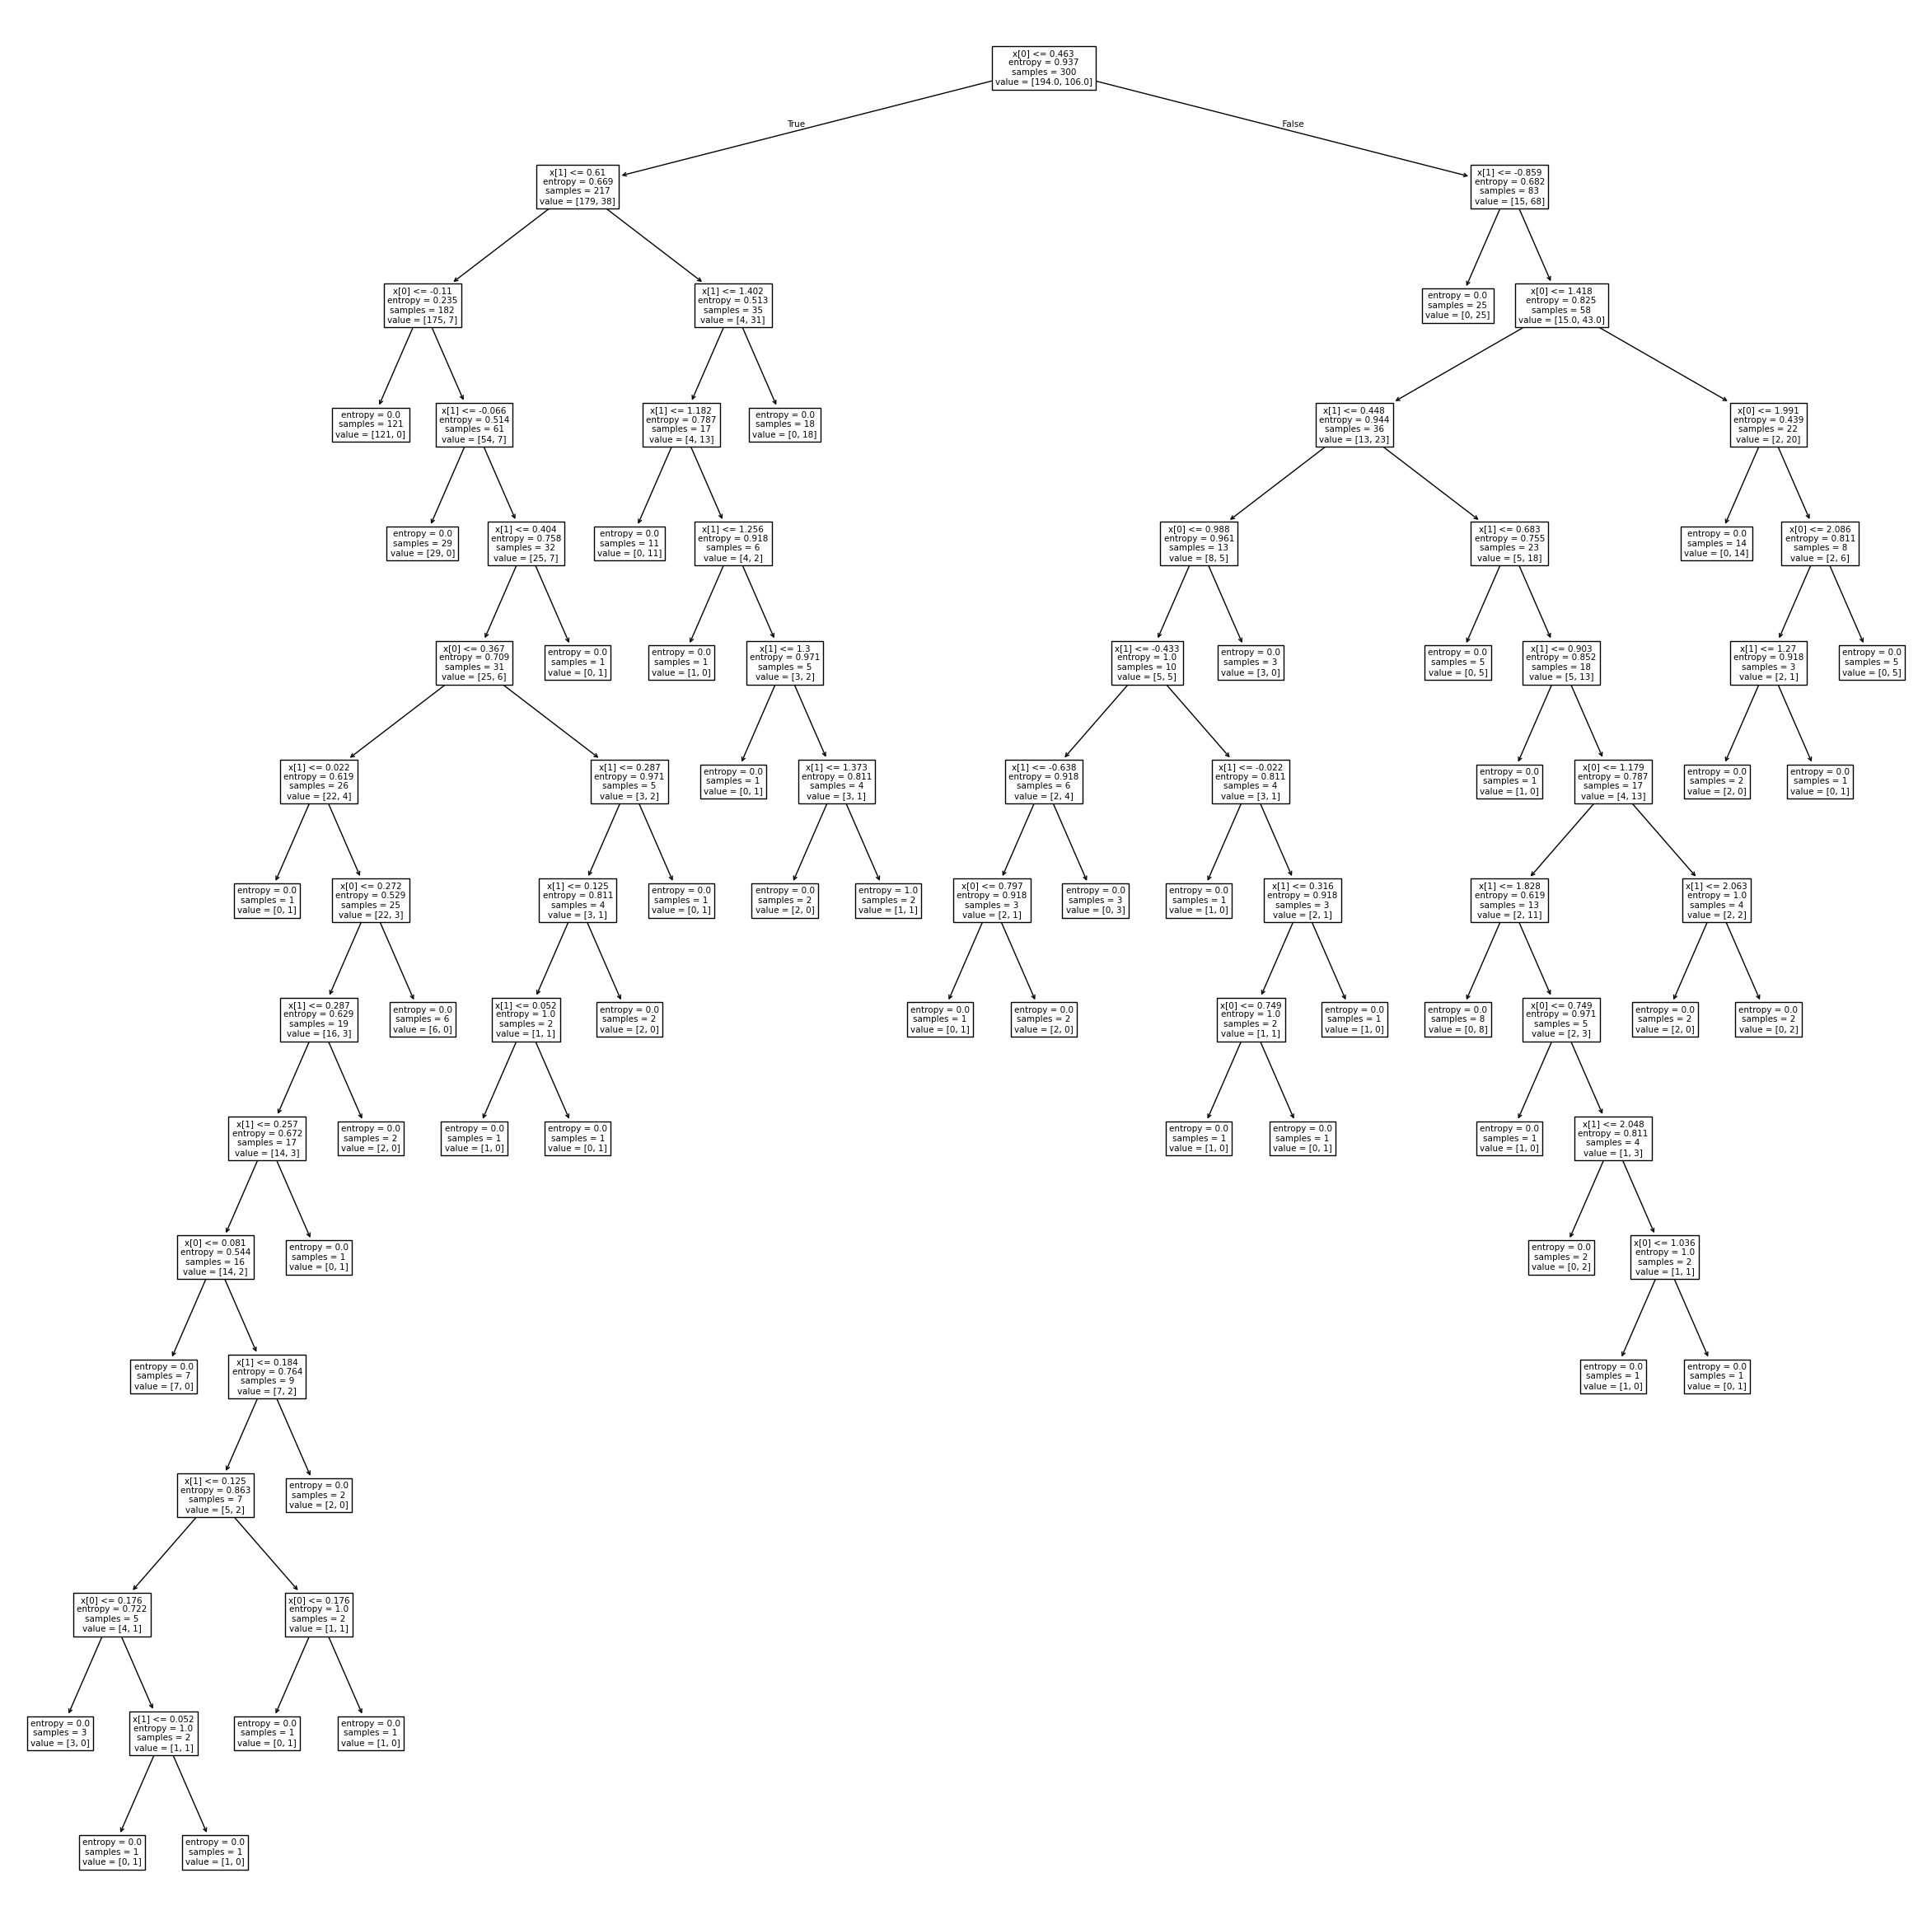

In [22]:
#for max-depth 2 value
plt.figure(figsize=(30,30))
plot_tree(dt1)
plt.savefig("tree2.png")  # Save the figure before displaying it
plt.show()  # Display the plot

In [23]:
for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_test,y_test),dt2.score(x_train,y_train),i)


0.89 0.8233333333333334 1
0.92 0.9133333333333333 2
0.92 0.9133333333333333 3
0.91 0.9333333333333333 4
0.89 0.9333333333333333 5
0.89 0.9566666666666667 6
0.87 0.97 7
0.85 0.9766666666666667 8
0.84 0.9866666666666667 9
0.83 0.99 10
0.83 0.99 11
0.85 0.99 12
0.84 0.9933333333333333 13
0.83 0.9966666666666667 14
0.83 0.9966666666666667 15
0.85 0.9966666666666667 16
0.84 0.9966666666666667 17
0.83 0.9966666666666667 18
0.85 0.9966666666666667 19
